In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Remove machine-generated tags

In [4]:
# Load tags and distros

with open('tags_freqs.pkl', 'rb') as f:
    tag_freqs = pickle.load(f)
    
len(tag_freqs)

35

In [5]:
tag_freqs.keys()

dict_keys([50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390])

In [7]:
filtered_freqs = {k: [x for x in tag_freqs[k] if not x.startswith('_')] for k in tag_freqs}
len(filtered_freqs)

35

In [9]:
len(filtered_freqs[390])

315

In [10]:
tag_cdf = {k: len(filtered_freqs[k]) for k in filtered_freqs}
len(tag_cdf)

35

In [11]:
tag_cdf

{50: 3654,
 60: 3138,
 70: 2536,
 80: 2221,
 90: 1981,
 100: 1788,
 110: 1606,
 120: 1470,
 130: 1361,
 140: 1273,
 150: 1208,
 160: 1137,
 170: 1079,
 180: 1008,
 190: 941,
 200: 869,
 210: 787,
 220: 712,
 230: 675,
 240: 642,
 250: 610,
 260: 516,
 270: 489,
 280: 464,
 290: 436,
 300: 416,
 310: 398,
 320: 388,
 330: 375,
 340: 367,
 350: 353,
 360: 347,
 370: 337,
 380: 323,
 390: 315}

# See distribution of tags to determine cutoff

In [2]:
# Load data
data = pd.read_pickle('../tumblr/data/halfday_text.pkl')
print(data.columns)
print(len(data))

Index(['post_id', 'activity_time_epoch', 'tumblog_id', 'post_title',
       'post_short_url', 'post_type', 'post_caption', 'post_format',
       'post_note_count', 'created_time_epoch', 'updated_time_epoch',
       'is_submission', 'source_title', 'source_url', 'post_classifier',
       'blog_classifier', 'accepts_answers', 'reblogged_from_post_id',
       'reblogged_from_metadata', 'root_post_id', 'body', 'mentions',
       'post_tags'],
      dtype='object')
3078642


In [4]:
def split_tags(tags, sep=',', combine_words=False):
    
    """ Returns list of tags from Tumblr's format """
    
    # Check for NaN
    if not isinstance(tags, str):
        return []
    
    spaced_tags = [tag[1:-1] for tag in tags[1:-1].split(sep)]
    
    if not combine_words:
        return spaced_tags
    else:
        nospace_tags = [tag.replace(' ', '') for tag in spaced_tags]
        return nospace_tags

In [5]:
tag_list = data['post_tags'].map(split_tags)
print(len(tag_list))
print(tag_list[0])

3078642
['promo', 'f4f', 'p4p', 'hogwarts']


In [9]:
tag_flat = [x for sublist in tag_list for x in sublist if x != '']
print(len(tag_flat))

2536453


In [10]:
tag_ctr = Counter(tag_flat)
len(tag_ctr)

720176

In [12]:
# range
print(min(tag_ctr.values()))
print(max(tag_ctr.values()))

1
19415


In [18]:
# Count of the counts
freq_ctr = Counter(list(tag_ctr.values()))
freq_ctr.most_common(10)

[(1, 550022),
 (2, 81231),
 (3, 26610),
 (4, 15535),
 (5, 8331),
 (6, 6333),
 (7, 4175),
 (8, 3434),
 (9, 2478),
 (10, 2122)]

In [24]:
# CDF

cdf = {x: sum([val for k,val in freq_ctr.items() if k >= x]) for x in freq_ctr}
sorted(cdf.items())[:10]

[(1, 720176),
 (2, 170154),
 (3, 88923),
 (4, 62313),
 (5, 46778),
 (6, 38447),
 (7, 32114),
 (8, 27939),
 (9, 24505),
 (10, 22027)]

In [27]:
sorted(cdf.items())[:500]

[(1, 720176),
 (2, 170154),
 (3, 88923),
 (4, 62313),
 (5, 46778),
 (6, 38447),
 (7, 32114),
 (8, 27939),
 (9, 24505),
 (10, 22027),
 (11, 19905),
 (12, 18258),
 (13, 16592),
 (14, 15418),
 (15, 14373),
 (16, 13518),
 (17, 12702),
 (18, 12069),
 (19, 11411),
 (20, 10916),
 (21, 10359),
 (22, 9950),
 (23, 9552),
 (24, 9236),
 (25, 8810),
 (26, 8451),
 (27, 8164),
 (28, 7923),
 (29, 7652),
 (30, 7419),
 (31, 7174),
 (32, 6999),
 (33, 6833),
 (34, 6658),
 (35, 6469),
 (36, 6297),
 (37, 6162),
 (38, 6053),
 (39, 5894),
 (40, 5767),
 (41, 5644),
 (42, 5508),
 (43, 5404),
 (44, 5306),
 (45, 5192),
 (46, 5107),
 (47, 5018),
 (48, 4939),
 (49, 4839),
 (50, 4768),
 (51, 4695),
 (52, 4632),
 (53, 4560),
 (54, 4501),
 (55, 4441),
 (56, 4383),
 (57, 4326),
 (58, 4276),
 (59, 4206),
 (60, 4165),
 (61, 3934),
 (62, 3884),
 (63, 3816),
 (64, 3766),
 (65, 3719),
 (66, 3679),
 (67, 3615),
 (68, 3576),
 (69, 3530),
 (70, 3460),
 (71, 3411),
 (72, 3378),
 (73, 3333),
 (74, 3288),
 (75, 3238),
 (76, 3200)

In [34]:
# Get tags

tag_d = {}

for i in range(50,400,10):
    tag_d[i] = [tag for tag in tag_ctr if tag_ctr[tag] >= i]

In [37]:
# Save tag_d, cdf
with open('tags_cdf.pkl', 'wb') as f:
    pickle.dump(cdf, f)
    
with open('tags_freqs.pkl', 'wb') as f:
    pickle.dump(tag_d, f)

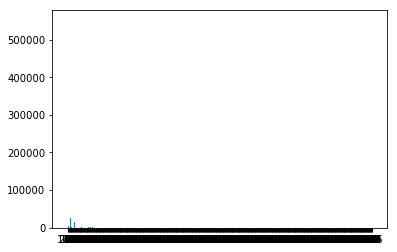

In [22]:
%matplotlib inline

# Bar chart
indices = np.arange(len(freq_ctr))
width = 1 # width of bar
plt.bar(indices, list(freq_ctr.values()), width)
# plt.xticks(indices + width * 0.5, list(freq_ctr.keys()))
plt.show()